In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from vplot import colors

# Hill stability across parameter space

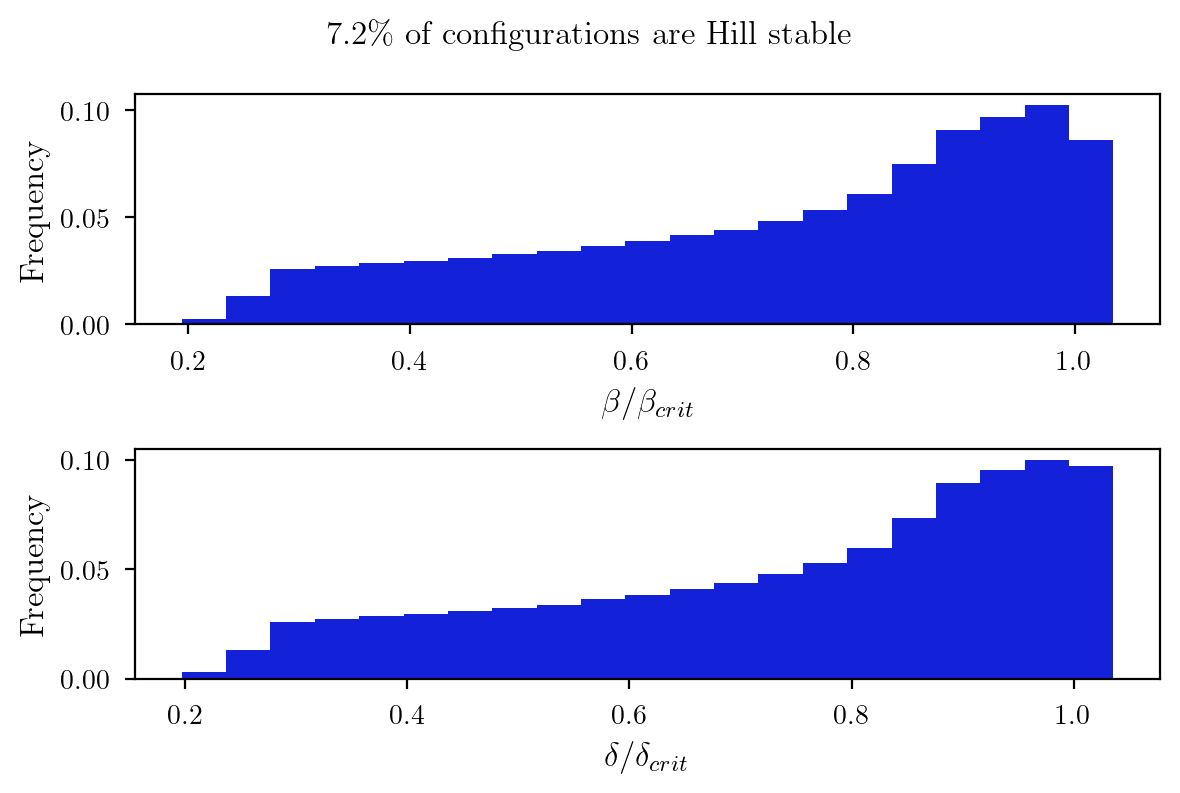

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def number_bins(trials):
  # Sturges' rule.
  return int(np.ceil(1. + np.log2(trials)))

column_names = ['exact', 'approx', 'd_mass', 'b_mass', 'd_semi', 'b_semi',
                'd_ecc', 'b_ecc', 'd_aper', 'b_aper', 'd_inc', 'b_inc',
                'd_lasc', 'b_lasc', 'd_mean_an', 'b_mean_an']

hillstab = pd.read_csv('proxhillstab.txt', sep=' ', names=column_names, index_col=False)
trials = len(hillstab['exact'])

frac_unstable = len([h for h in hillstab['exact'] if h < 1.])/trials

fig, ax = plt.subplots(2, 1, dpi=200)
if frac_unstable != 0.:
    fig.suptitle(r'{:.1f}\% of configurations are Hill stable'.format((1. - frac_unstable)*100))
ax[0].hist(hillstab['exact'], bins=number_bins(trials), weights=np.ones_like(hillstab['exact'])/trials, color=colors.dark_blue)
ax[0].set_xlabel(r'$\beta/\beta_{crit}$')
ax[1].hist(hillstab['approx'], bins=number_bins(trials), weights=np.ones_like(hillstab['approx'])/trials, color=colors.dark_blue)
ax[1].set_xlabel(r'$\delta/\delta_{crit}$')
for a in ax.ravel():
    a.set_ylabel('Frequency')
# fig.savefig('hill-stability.pdf', bbox_inches='tight');

# Hill stability boundary in eccentricity space

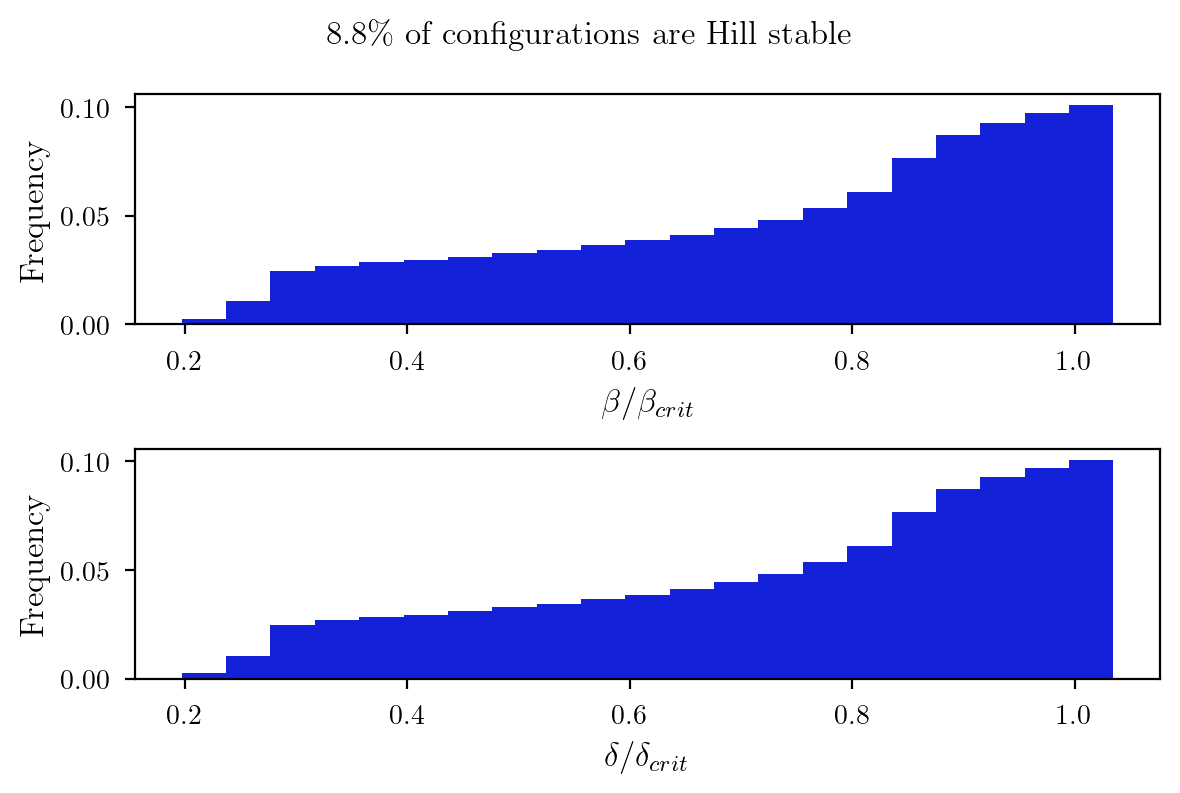

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def number_bins(trials):
  # Sturges' rule.
  return int(np.ceil(1. + np.log2(trials)))

column_names = ['exact', 'approx', 'd_mass', 'b_mass', 'd_semi', 'b_semi',
                'd_ecc', 'b_ecc', 'd_aper', 'b_aper', 'd_inc', 'b_inc',
                'd_lasc', 'b_lasc', 'd_mean_an', 'b_mean_an']

hillstab = pd.read_csv('proxhillstabecc.txt', sep=' ', names=column_names, index_col=False)
trials = len(hillstab['exact'])

frac_unstable = len([h for h in hillstab['exact'] if h < 1.])/trials

fig, ax = plt.subplots(2, 1, dpi=200)
if frac_unstable != 0.:
    fig.suptitle(r'{:.1f}\% of configurations are Hill stable'.format((1. - frac_unstable)*100))
ax[0].hist(hillstab['exact'], bins=number_bins(trials), weights=np.ones_like(hillstab['exact'])/trials, color=colors.dark_blue)
ax[0].set_xlabel(r'$\beta/\beta_{crit}$')
ax[1].hist(hillstab['approx'], bins=number_bins(trials), weights=np.ones_like(hillstab['approx'])/trials, color=colors.dark_blue)
ax[1].set_xlabel(r'$\delta/\delta_{crit}$')
for a in ax.ravel():
    a.set_ylabel('Frequency')

In [4]:
# Masks
hill_stable = hillstab.mask(hillstab['exact'] <= 1.).dropna()
hill_unstable = hillstab.mask(hillstab['exact'] > 1.).dropna()

In [5]:
# Select 1000 cases for visualization
stable_decc = [d for i, d in enumerate(hill_stable['d_ecc']) if i % 1000 == 0]
stable_becc = [b for i, b in enumerate(hill_stable['b_ecc']) if i % 1000 == 0]
unstable_decc = [d for i, d in enumerate(hill_unstable['d_ecc']) if i % 1000 == 0]
unstable_becc = [b for i, b in enumerate(hill_unstable['b_ecc']) if i % 1000 == 0]

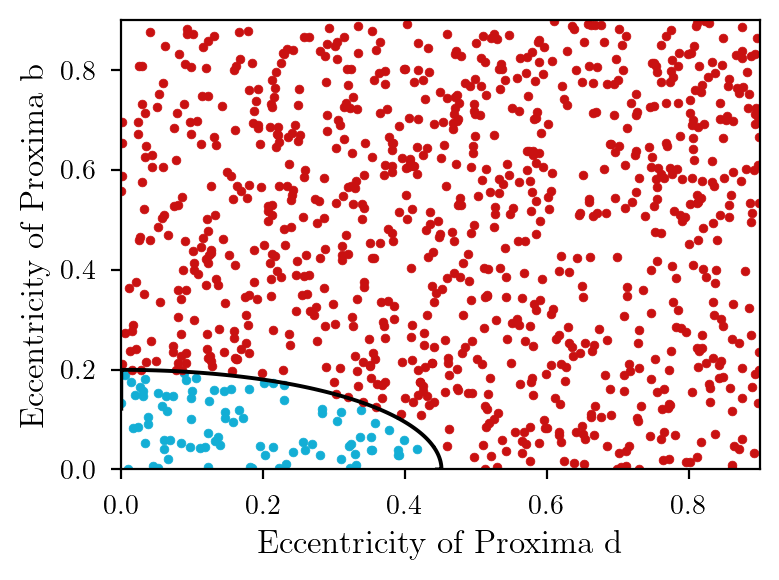

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=200)
ax.scatter(stable_decc, stable_becc, c=colors.pale_blue, s=10)
ax.scatter(unstable_decc, unstable_becc, c=colors.red, s=10)
ax.tricontour(hillstab['d_ecc'], hillstab['b_ecc'], hillstab['exact'], levels=[1.], colors=['k'])
ax.set_xlabel('Eccentricity of Proxima d')
ax.set_ylabel('Eccentricity of Proxima b');
# fig.savefig('hill-stability-boundary.pdf', bbox_inches='tight')